## Importing the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None) #To make sure all the columns are displayed

## Q1  Univariate Analysis

In [5]:
dataset = pd.read_excel("Credit Card Customer Data.xlsx")

In [6]:
dataset.head() #Check the head of the dataframe

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
dataset.info() #Total 660 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
features = ['Total_visits_bank','Total_visits_online','Total_calls_made']

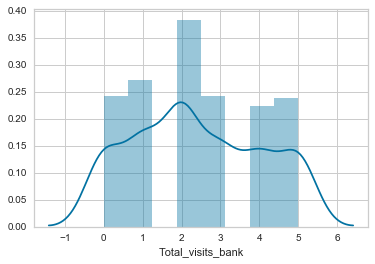

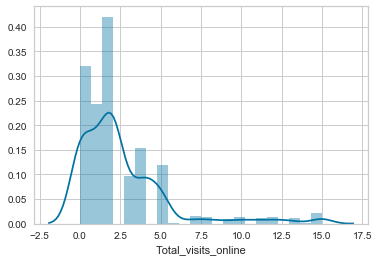

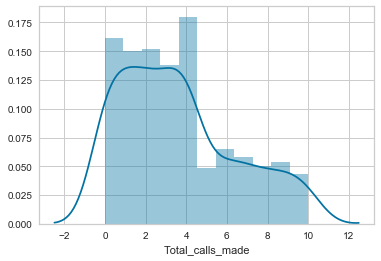

In [9]:
for feature in features:
    sns.distplot(dataset[feature]) #Checking the distributions of the interactions
    plt.show()

In [10]:
dataset.drop(['Sl_No','Customer Key'],axis=1).describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


 1. There are no missing values
 2. A customer carries ~5 CreditCards on an average and visits ~2 times on an average
 3. There are customers who do not visit banks / online/calls 


C:\Users\mohit\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':


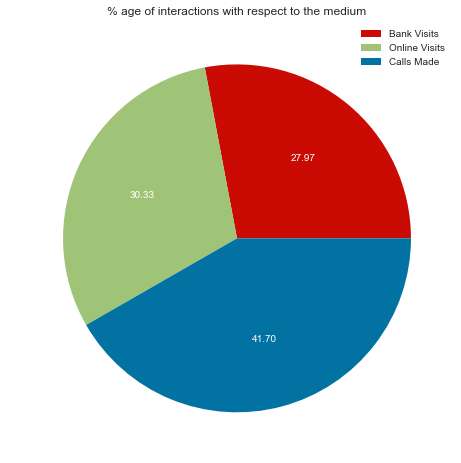

In [11]:
### Creating a new feature with total interaction with banks  for analysis
data=dataset.copy() #Copying the dataset into a new memory
data['Total_interactions'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']
# Total interactions = total calls + totals visits in banks + total online visits
plt.figure(figsize=(12,8))
feature_perc=[]
for feature in features:
    feature_perc.append((data[feature].sum()/data['Total_interactions'].sum())*100)
plt.pie(feature_perc,labels=['Bank Visits','Online Visits','Calls Made'],autopct='%1.2f',colors='RGB',textprops=dict(color="w"))
plt.legend()
plt.title("% age of interactions with respect to the medium")
plt.show()



##  Q2,Q3,Q4 - Perform EDA  ,Create Visualizations and present insights

In [12]:
#Finding duplicate rows
dataset[dataset.duplicated(subset=None, keep='first')]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


* There are no duplicate entries in the dataset

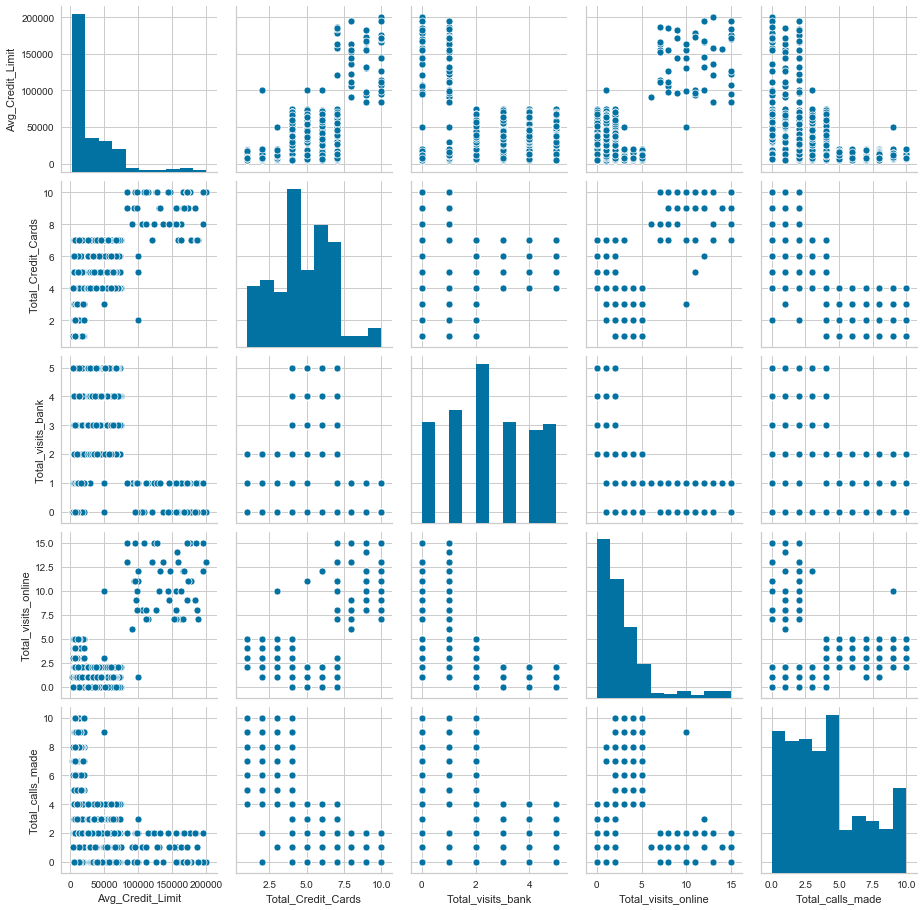

In [13]:
data = dataset.drop(['Sl_No','Customer Key'],axis=1).copy()
sns.pairplot(data) #Pairplot from seaborn library

In [14]:
data.corr() #Checking the correlation of the features

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


## Key Observations:

**Customers with Avg_Credit_Limit > ~60,000 which maybe loyal customers make fewer calls (0-2.5) than the customers with   Avg_Credit_Limit ~10,000 to 25000**

**Customers with 1-4 Credit Cards make more than 5 calls (5-10)**

**People with lower limit, makes more visits to the bank**

**Customers who visits banks less frequently makes more phone calls**10. 

### Total_Credit_Cards v/s Avg_Credit_Limit

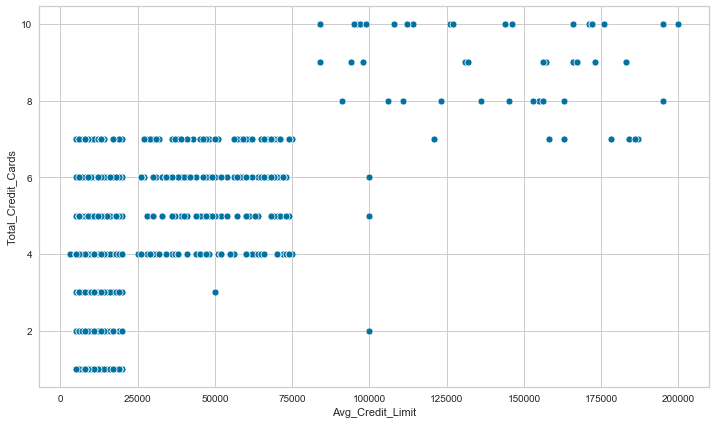

In [15]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards',data=dataset)

1.There are two clusters:
    **Customers with Average Credit Limit <100000 And Customers with Average Credit Limit < 75000**

### Avg_Credit_Limit vs Total_visits_banks


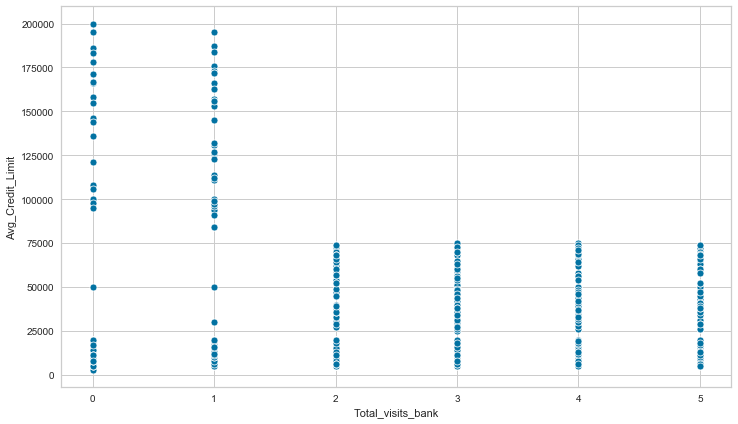

In [16]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_bank',y='Avg_Credit_Limit',data=dataset) 

**People with Average Limit > ~70000 make 0 to 1 visits to the bank**
**People with Average Credit Limit < ~70000 visit frequently i.e. 2 to 5 times**

### Avg_Credit_Limit v/s Total_visits_online 

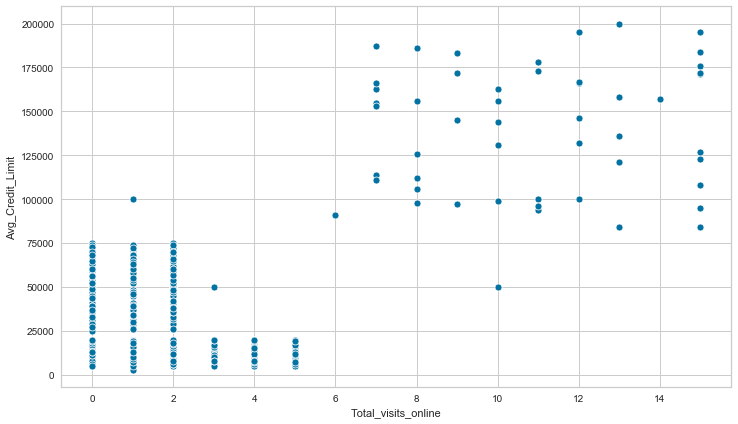

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Avg_Credit_Limit',data=dataset) 

**There clearly seems to be differentiated 2 clusters on the basis of above two features**

**People with Average Credit Limit >75000 visits more frequently online(>7 times)**

###  Total_Credit_Cards v/s Total_visits_online graph

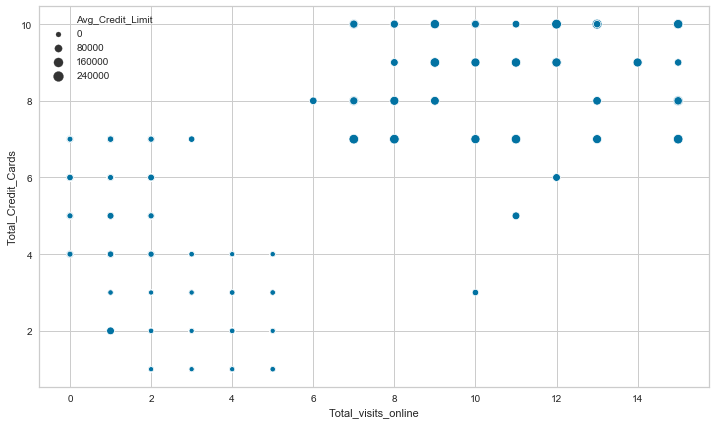

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Total_Credit_Cards',size='Avg_Credit_Limit',data=dataset) 

**There seems to be two differentiable clusters on the basis of above two features**

**Customers with more than 7 credit cards and with Average Limit > 80000 visits  online more frequently**

## Total_visits_online v/s Total_calls_made


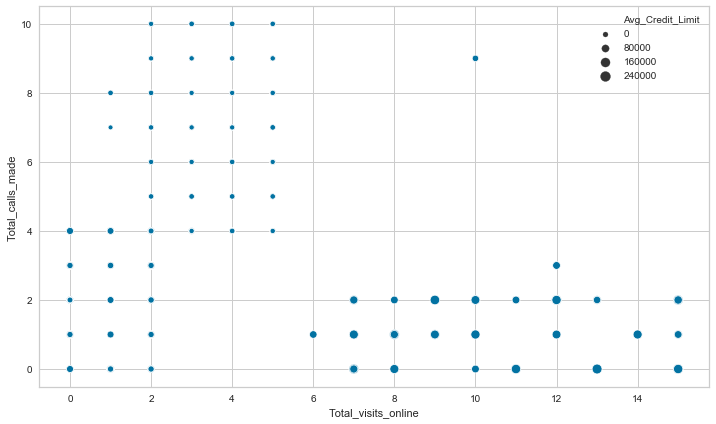

In [19]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Total_visits_online',y='Total_calls_made',size='Avg_Credit_Limit',data=dataset) 

#Dots are sized relative to the Avg_Credit_Limit

**There seems to be cleary two clusters on the above two features**

**Customers who visit less frequently online make more phone calls**

**People with Average credit limit >80000 make more frequent online visits**

### Creating a new feature with total interaction with banks  for analysis

In [20]:
### Creating a new feature with total interaction with banks  for analysis
data=dataset.copy() #Copying the dataset into a new memory
data['Total_interactions'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']
# Total interactions = total calls + totals visits in banks + total online visits

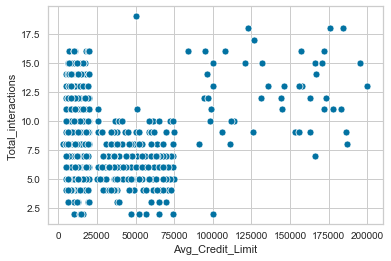

In [21]:
sns.scatterplot(x='Avg_Credit_Limit',y='Total_interactions',data=data)

**Customers can be segmented on the basis of Total interactions or total complaints with bank and the average credit limit**

## Q5 Execute KMeans

In [22]:
X = dataset.iloc[:,2:].values #Selecting the features

In [23]:
X.shape 

(660, 5)

**As there is a difference in magnitude of Credit Limit and other features, we will scale the features**

**As there are not any negative values, we can use MinMaxScaler**

In [24]:
from sklearn.preprocessing import MinMaxScaler #Importing MinMaxScaler
scaler= MinMaxScaler() #Initialising the instance of the scaler
scaled_features = scaler.fit_transform(X) #Storing the scaled version of features in scaled_features

In [25]:
from sklearn.cluster import KMeans #Importing KMeans from sklearn

In [26]:
## Writing a for loop to plot the graph for within cluster sum of squares

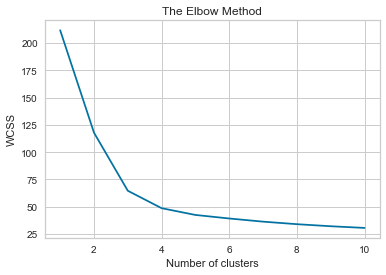

In [27]:
wcss = [] #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #Initialising 
    kmeans.fit(scaled_features) #Fitting on scaled features
    wcss.append(kmeans.inertia_) #Appending the wcss to the blank list
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

**As there is smooth descent afer n_clusters = 3 we will choose number of clusters as 3**

In [28]:
## Training the K-Means model on the dataset

In [29]:
!pip install yellowbrick

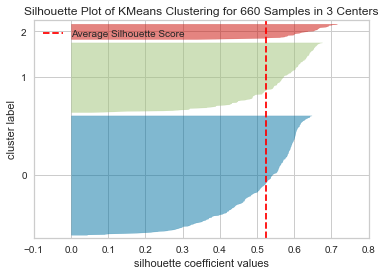

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) #Initialising 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_features)        # Fit the data to the visualizer
visualizer.show()

In [50]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [51]:
print(y_kmeans)

[0 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0
 2 0 2 2 0 0 0 0 0 0 0 0 

In [52]:
Segment = pd.DataFrame(y_kmeans,columns=['Segment']) #Converting the cluster to data frame
Segment

,Segment
0,0
1,0
2,0
3,2
4,0
...,...
655,0
656,0
657,1
658,1


In [53]:
data=dataset.copy()
data=pd.concat([data,Segment],axis=1)

In [54]:
features = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

In [36]:
## Analyzing the results

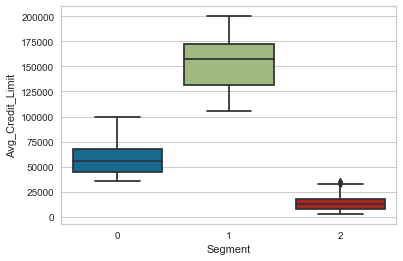

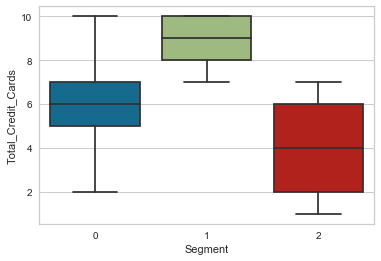

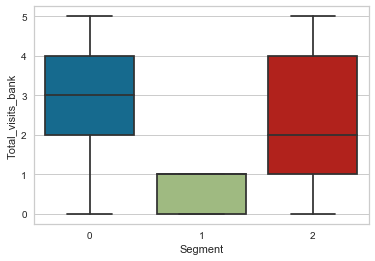

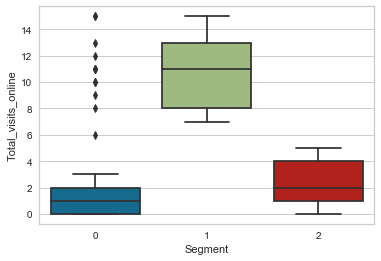

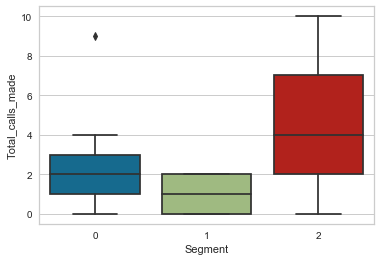

In [55]:
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='Segment',y=feature,data=data)
    plt.show()

# Q6 Hierarchical Clustering

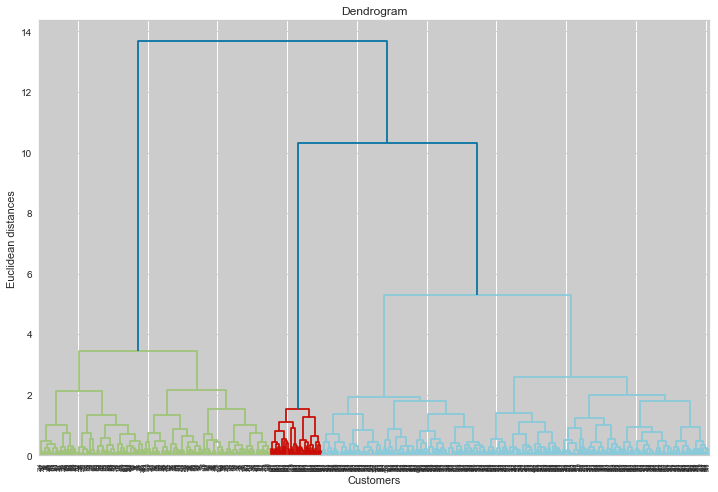

In [38]:
import scipy.cluster.hierarchy as sch #import the library
plt.figure(figsize=(12,8)) #Canvas size
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**Based on the dendrogram number of clusters = 3**

In [39]:
from scipy.cluster.hierarchy import cophenet

In [40]:
cophenet_ =np.mean(cophenet(sch.linkage(scaled_features)))
cophenet_

0.21442781737262284

In [41]:
from sklearn.cluster import AgglomerativeClustering #Importing lib
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') #Euclidean distance, and ward linkage
y_hc = hc.fit_predict(X) #TrainingTheModel

In [42]:
y_hc #Predictions

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
df_yhc = pd.DataFrame(y_hc,columns=['HCluster'])

In [44]:
data= dataset.copy()
data = pd.concat([data,df_yhc],axis=1)
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HCluster
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1


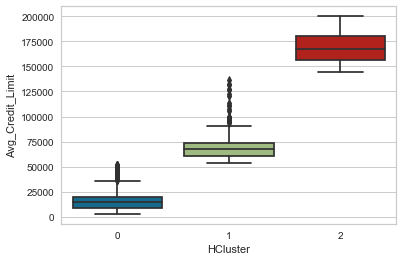

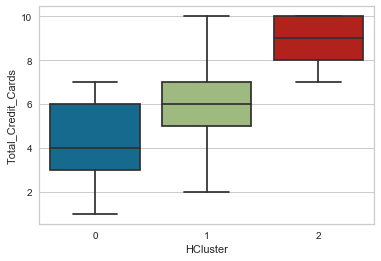

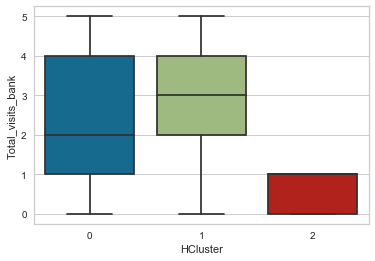

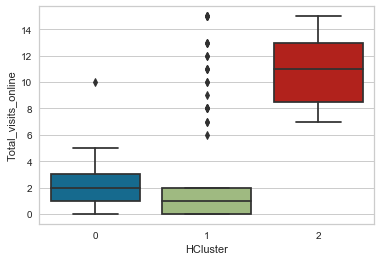

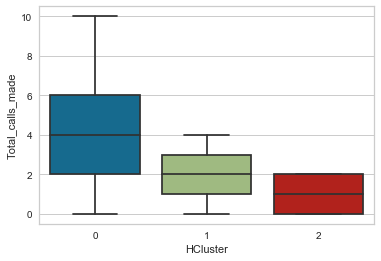

In [45]:
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='HCluster',y=feature,data=data)
    plt.show()

## Q7 Calculate avg silhoutte scores

In [46]:
from sklearn.metrics import silhouette_score

In [56]:
kmeans_score= silhouette_score(scaled_features,y_kmeans)
kmeans_score

0.1467806616998487

In [57]:
hc_score= silhouette_score(scaled_features,y_hc)
hc_score

0.11914770655113151

In [49]:
print("The silhoutte score of kmeans and Hierarchical Cluster are {} and {} respectively".format(kmeans_score,hc_score))


The silhoutte score of kmeans and Hierarchical Cluster are 0.058573709938719964 and 0.11914770655113151 respectively


**The hc_score is greater than kmeans_score**

Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

# Q8 Comparing the clusters

Overall for this dataset Agglomerative Clustering has given better results.
The silhoutte score of kmeans and Hierarchical Cluster are 0.058573709938719964 and 0.11914770655113151 respectively
HC has higher silhoutte score.

# Q9 Final answers

## Kmeans Clusters

1. Segment 0 has low credit limit and more number of total credit cards.

    -This maybe the indication that they have high credit usage and low income.

    -Segment 0 makes complaints by the medium of phone calls. 

    -The bank can arrange periodical feedback phone calls from Relationship Managers at the bank
    
    **They can be targeted for cross selling by the medium of phone calls**

2. Segment 1 makes 

    -less number of phone calls 

    -highest number of online visits

    -does not visit the bank at all

    -This maybe the indication that Segment 1 is literate and premium customers of the bank with higher income.

    **Luxury offers through emails and offers related to online shopping or coupons can be targeted to this segment**
    **They have the potential of being most profitable customers**

3. Segment 2 have almsot similar characterstics:
    
    -Median of 3 visits to the bank
    
    -Relatively higher visits to the bank
    
    -holds 4-6 Total Credit Cards
    
    **Both can targeted for cross selling through in bank managers and promotional advertisements in the bank**
    
    **Servicescape Promotions are Promotions done in the environment where the service is offered**

## hierarchial Clusters

**Observations**:

**Cluster 0**

-highest number of phone calls made

-Less online presence/visits

-high number of visits to the bank

-low limit

-lowest number of cards

**The cluster 0 should be targeted through phone calls with Relationship Managers and cross selling through phone calls**
    

**Observations**:

**Cluster 1**

-medium number of calls made

-lowest online visits

-More number of visits in the bank

-medium limit and cards


**Customers in Cluster 1 should be targeted for cross selling through banks branches**

**Observations**:

**Cluster 2**

-lowest number of calls made

-highest online visits

-negligible number of visits in the bank

-high limit and cards


**Platinum tier customers**

**Affluent and premium customers are present in cluster 2.They should be targeted through loyalty prograns and luxury offers**

## Cluster 0 and Cluster 1 should be targeted to cover the operational costs


## Cluster 2 should be targeted to reap profits

# Thank You!